# Convolutional Neural Network

#### IMPORTS

In [2]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import datetime

In [ ]:
%load_ext tensorboard
#!rm -rf ./logs_cnn/ 

#### DATASET

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


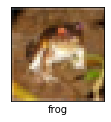

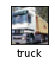

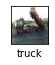

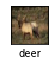

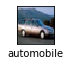

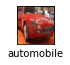

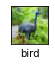

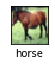

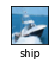

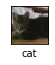

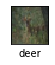

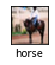

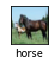

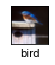

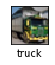

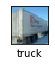

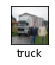

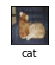

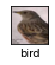

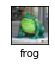

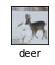

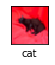

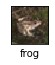

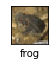

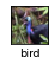

In [6]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

x_train = x_train / 255
x_val = x_val / 255

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

#### MODEL

In [9]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)               

#### ENTRAINEMENT

In [11]:
log= "logs_cnn/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log, histogram_freq=1)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=100, callbacks=[tensorboard_callback],
                    validation_data=(test_images, test_labels))


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 36s 717us/sample - loss: 1.6907 - accuracy: 0.4032 - val_loss: 1.3740 - val_accuracy: 0.5034
Epoch 2/100
50000/50000 [==============================] - 36s 719us/sample - loss: 1.2841 - accuracy: 0.5467 - val_loss: 1.1850 - val_accuracy: 0.5927
Epoch 3/100
50000/50000 [==============================] - 36s 719us/sample - loss: 1.1186 - accuracy: 0.6095 - val_loss: 1.1301 - val_accuracy: 0.6101
Epoch 4/100
50000/50000 [==============================] - 37s 732us/sample - loss: 1.0268 - accuracy: 0.6437 - val_loss: 1.2101 - val_accuracy: 0.5995
Epoch 5/100
50000/50000 [==============================] - 38s 768us/sample - loss: 0.9541 - accuracy: 0.6723 - val_loss: 1.0771 - val_accuracy: 0.6352
Epoch 6/100
50000/50000 [==============================] - 35s 691us/sample - loss: 0.8950 - accuracy: 0.6925 - val_loss: 1.0580 - val_accuracy: 0.6487
Epoch 7/100
50000/50000 [=============

#### VALIDATION

10000/1 - 2s - loss: 2.8724 - accuracy: 0.6276


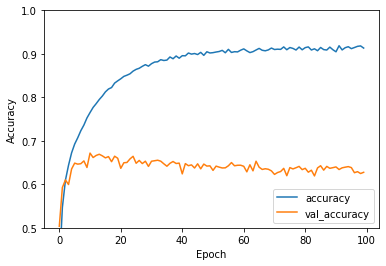

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


In [ ]:
%tensorboard --logdir logs_cnn/fit